[Index](abc.ipynb) - [Back](abc.ipynb) - [Next](abc.ipynb) 

# Interactively Graph Future Annunity Value

In [ ]:
pip install pandas
pip install matplotlib

In [1]:
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime as date

https://docs.scipy.org/doc/numpy/reference/generated/numpy.fv.html
## numpy.fv

numpy.fv(rate, nper, pmt, pv, when='end')[source]
Compute the future value.

### Given:
a present value, pv
an interest rate compounded once per period, of which there are
nper total
a (fixed) payment, pmt, paid either
at the beginning (when = {‘begin’, 1}) or the end (when = {‘end’, 0}) of each period
### Return:
the value at the end of the nper periods
### Parameters:	
rate : scalar or array_like of shape(M, )

Rate of interest as decimal (not per cent) per period

nper : scalar or array_like of shape(M, )
Number of compounding periods

pmt : scalar or array_like of shape(M, )
Payment

pv : scalar or array_like of shape(M, )
Present value

when : {{‘begin’, 1}, {‘end’, 0}}, {string, int}, optional

When payments are due (‘begin’ (1) or ‘end’ (0)). Defaults to {‘end’, 0}.


### Returns:	
out : ndarray

Future values. If all input is scalar, returns a scalar float. If any input is array_like, returns future values for each input element. If multiple inputs are array_like, they all must have the same shape.

https://docs.scipy.org/doc/numpy/reference/generated/numpy.pmt.html#numpy.pmt
## numpy.pmt

numpy.pmt(rate, nper, pv, fv=0, when='end')[source]
Compute the payment against loan principal plus interest.

### Given:
a present value, pv (e.g., an amount borrowed)
a future value, fv (e.g., 0)
an interest rate compounded once per period, of which there are
nper total
and (optional) specification of whether payment is made at the beginning (when = {‘begin’, 1}) or the end (when = {‘end’, 0}) of each period

### Return:
the (fixed) periodic payment.

### Parameters:	
rate : array_like
Rate of interest (per period)

nper : array_like
Number of compounding periods

pv : array_like
Present value

fv : array_like, optional
Future value (default = 0)

when : {{‘begin’, 1}, {‘end’, 0}}, {string, int}
When payments are due (‘begin’ (1) or ‘end’ (0))

### Returns:	
out : ndarray

Payment against loan plus interest. If all input is scalar, returns a scalar float. If any input is array_like, returns payment for each input element. If multiple inputs are array_like, they all must have the same shape.

In [35]:
def calcMonthly(Interest_Rate, Years, Payments_Year, Principal):
    
    start_date = date.date(2020,2,1)
    
    return np.pmt(
        w.kwargs['Interest_Rate'] /
        w.kwargs['Payments_Year'][0],
        w.kwargs['Payments_Year'][0] *
        w.kwargs['Years'],
        w.kwargs['Principal']
    ).round(2)

def graph(w):
    s = pd.date_range('2020-02-01', periods=w.kwargs['Years']*w.kwargs['Payments_Year'][0], freq=w.kwargs['Payments_Year'][1])
    s.name = "Income Date"

    df = pd.DataFrame(index = s, columns=['Interval Income', 'Total Income','PV of Annunity'], dtype='float')
    df.reset_index(inplace=True)
    df.index += 1
    df.index.name = "Interval"
    df["Interval Income"] = w.result
    df["Total Income"] = df["Interval Income"].cumsum()
    
    #Create dataframe
    for i in range(0, len(df) ):
        df.iloc[i, 3] = np.fv(
            w.kwargs['Interest_Rate'] /
            w.kwargs['Payments_Year'][0],
            i + 1,
            w.result,
            w.kwargs['Principal'] 
        ).round(2)

    fig = plt.figure()
    ax1 = plt.axes([0.1,0.1,0.8,0.8])
    
    ax1.plot(df['Income Date'], df['PV of Annunity'],
             label = "PV of Annunity")
    ax1.plot(df['Income Date'], df['Total Income'],
             label = "Monthly Income PV")
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Dollars")
    plt.title = "Title"

    plt.legend()
    plt.show()

    return  {
         "$/Interval": 
             w.result.round(2), 
         "$/Year": (
             w.result * 
             w.kwargs['Payments_Year'][0]).round(2), 
         "Interest over Annunity": (
             w.result * 
             w.kwargs['Payments_Year'][0] *
             w.kwargs['Years'] + w.kwargs['Principal']).round(2), 
         "FV of Annunity": (
             w.result * 
             w.kwargs['Payments_Year'][0] *
             w.kwargs['Years']).round(2), 
         "Interest over Annunity": (
             (w.result * w.kwargs['Payments_Year'][0] *
             w.kwargs['Years']) + 
             w.kwargs['Principal']).round(2), 
         "kwargs" : 
             w.kwargs
            }, df

w = interactive(calcMonthly, #{'manual': False},
                Interest_Rate = (0.00, 0.15, 0.0050),
                Years = (0, 40, 1),
                Payments_Year = [
                    ('Monthly', [12,'BM']), 
                    ('Weekly', [52,'W']), 
                    ('Yearly', [1,'BY'])
                ],
                Principal = (-1000000, 0, 25000)  # -100000) 
               )  # w.kwargs

In [36]:
display(w)

interactive(children=(FloatSlider(value=0.075, description='Interest_Rate', max=0.15, step=0.005), IntSlider(v…

KeyError: 'Present Value'

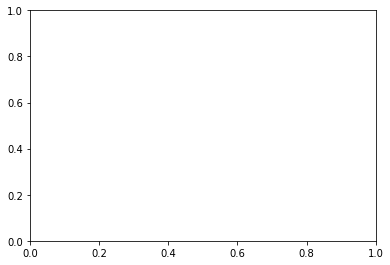

In [34]:
data = graph(w)

In [31]:
data[0], data[1]

({'$/Interval': 6292.93,
  '$/Year': 75515.16,
  'Interest over Annunity': 1365454.8,
  'FV of Annunity': 2265454.8,
  'kwargs': {'Interest_Rate': 0.075,
   'Years': 30,
   'Payments_Year': [12, 'BM'],
   'Principal': -900000}},
          Income Date  Interval Income  Total Income  Present Value
 Interval                                                          
 1         2020-02-28          6292.93       6292.93      899332.07
 2         2020-03-31          6292.93      12585.86      898659.97
 3         2020-04-30          6292.93      18878.79      897983.66
 4         2020-05-29          6292.93      25171.72      897303.13
 5         2020-06-30          6292.93      31464.65      896618.34
 6         2020-07-31          6292.93      37757.58      895929.28
 7         2020-08-31          6292.93      44050.51      895235.91
 8         2020-09-30          6292.93      50343.44      894538.20
 9         2020-10-30          6292.93      56636.37      893836.13
 10        2020-11-30  

### Example code

In [5]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(m, b):
    plt.figure(2)
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…